In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Import the dataset and begin to clean it.


In [10]:
# Load the dataset
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model-year', 'origin', 'car-name'
]
df = pd.read_csv(
        "auto+mpg/auto-mpg.data",
        sep=r'\s+',  # Use whitespace as a delimiter (handles one or more spaces)
        names=column_names,     # Assign the column names we defined
        na_values='?'
)

# Read the head of the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
print(df.shape)

(398, 9)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car-name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [19]:
df['brand'] = df['car-name'].str.split(' ').str[0]

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name,brand
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,ford


In [21]:
brand_counts = df['brand'].value_counts()

print("Number of rows for each car brand:")
print(brand_counts)
print("Total number")
print(brand_counts.sum())

Number of rows for each car brand:
brand
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
renault           5
saab              4
subaru            4
opel              4
chevy             3
cadillac          2
bmw               2
mercedes-benz     2
maxda             2
hi                1
toyouta           1
chevroelt         1
capri             1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: count, dtype: int64
Total number
398


In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
df.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model-year      0
origin          0
car-name        0
brand           0
dtype: int64

In [24]:
df.loc[:, 'horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [25]:
df.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
origin          0
car-name        0
brand           0
dtype: int64

In [46]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name,brand
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,ford


In [49]:
# brand_dummies = pd.get_dummies(df['brand'], prefix='brand')

# # Concatenate the new dummy variables with your original DataFrame
# # 'axis=1' means concatenate columns
# df_encoded = pd.concat([df, brand_dummies], axis=1)

df_encoded = df.drop(columns=['brand', 'car-name'])

df_encoded.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [50]:
# ford_cars_count = df_encoded['brand_ford'].sum()
# print(f"Number of Ford cars: {int(ford_cars_count)}")

<Axes: >

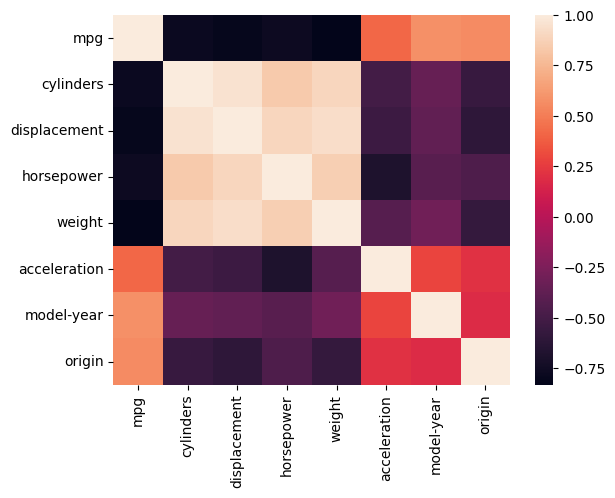

In [51]:
sns.heatmap(df_encoded.corr())

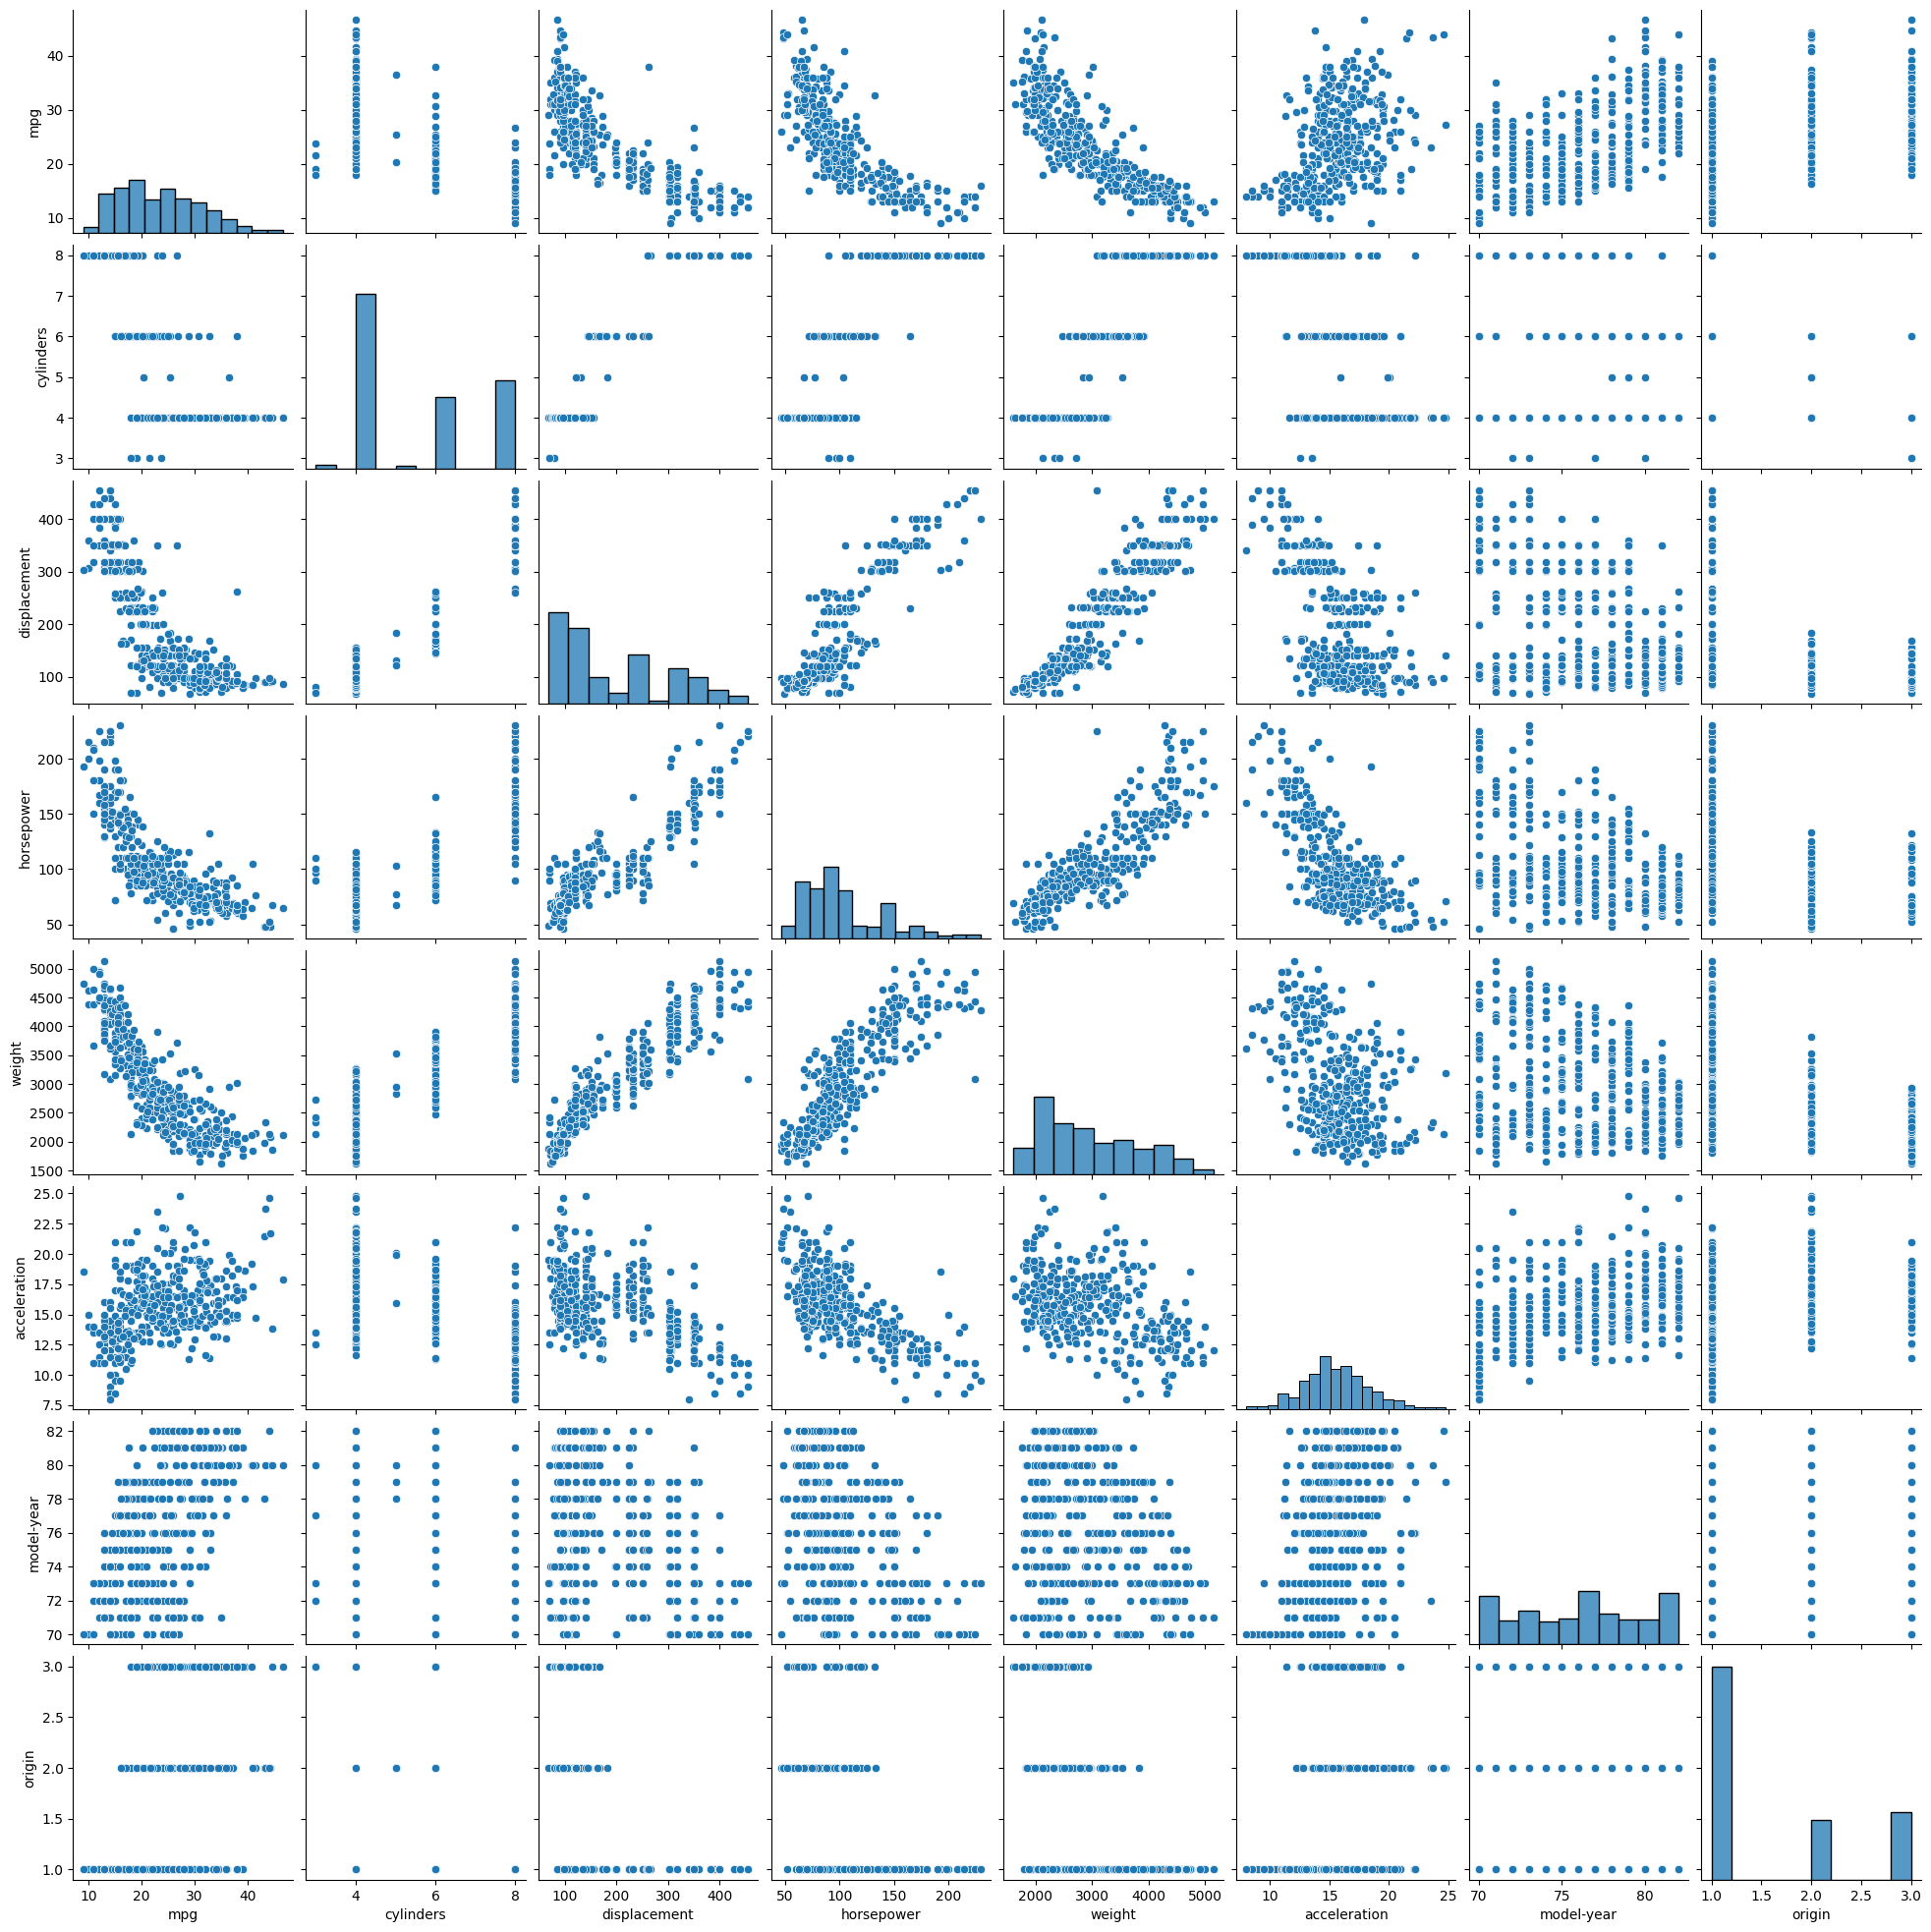

In [52]:
sns.pairplot(df_encoded)

In [53]:
X = df_encoded.drop(columns=['mpg'])
y = df_encoded['mpg']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

skewed_features = ['displacement', 'horsepower']

# Columns that only need Standard Scaling
# This includes LotFrontage, OverallQual, OverallCond, 1stFlrSF
# Make sure to exclude any features that are already one-hot encoded or handled otherwise
numerical_features_to_scale = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model-year', 'origin']


# Create a ColumnTransformer
# It allows different transformers to be applied to different columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', PowerTransformer(method='yeo-johnson'), skewed_features), # Apply Yeo-Johnson to skewed
        ('scaler', StandardScaler(), numerical_features_to_scale) # Apply StandardScaler to others
    ],
    remainder='passthrough' # Keep any other columns not specified (e.g., if you have categorical ones not listed)
)

In [62]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Our ColumnTransformer for preprocessing
    ('regressor', LinearRegression()) # Your chosen model
])

# Now, train the model using the pipeline
# The pipeline will automatically:
# 1. Apply PowerTransformer (Yeo-Johnson) to 'LotArea' (and any other specified skewed features)
# 2. Apply StandardScaler to 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF'
# 3. Fit the Linear Regression model on the transformed data
model_pipeline.fit(X_train, y_train_transformed)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_transform', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Mean Squared Error (MSE): 5.78
Root Mean Squared Error (RMSE): 2.40
R-squared (R2): 0.8968


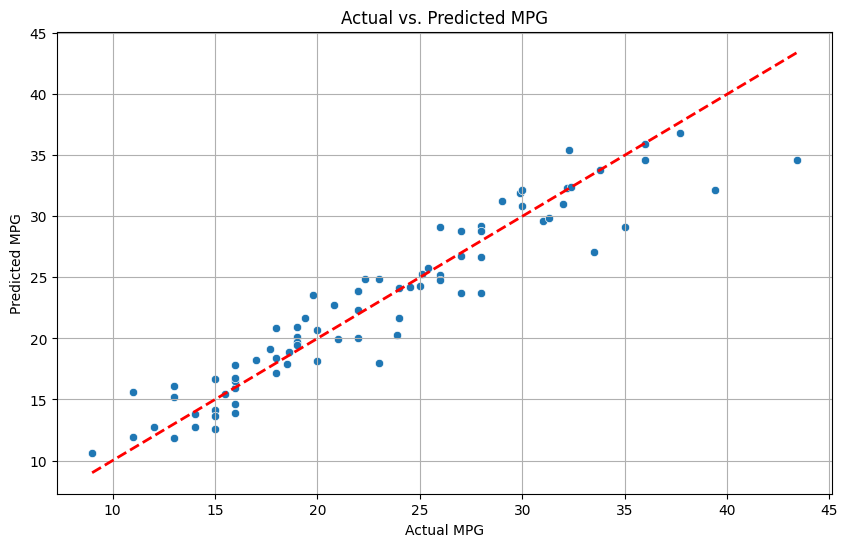

In [63]:
# Make predictions on the test set
y_pred_transformed = model_pipeline.predict(X_test)

# Inverse transform the predictions back to the original SalePrice scale (dollars)
y_pred = np.expm1(y_pred_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.grid(True)
plt.show()